In [ ]:
import numpy as np                                                                                   # импорт numpy
import pandas as pd                                                                                  # импорт pandas
from google.colab import files                                                                       # Импорт для импорта своего csv файла
from google.colab import drive
import matplotlib.pyplot as plt                                                                      # импорт для рисования графиков
from sklearn import datasets                                                                         # импорт модуля датасетов
from sklearn.metrics import accuracy_score                                                           # импорт функции для нахождения точности
from sklearn.model_selection import train_test_split                                                 # импорт для разделение датасетов
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB  # импорт методов Байеса
from sklearn.utils import Bunch                                                                      # импорт для Bunch, используются для хранения данных датасета
from sklearn.preprocessing import OrdinalEncoder                                                     # импорт для кодировки категориальных датасетов

**Наивный Байес** - это простой вероятностный классификатор, основанный на принципе байесовской вероятности. Он используется для решения задач классификации, анализа текста, фильтрации спама и других задач машинного обучения.

Основная идея метода заключается в предположении о наивности признакового пространства, что означает независимость признаков друг от друга. Это позволяет упростить расчеты и сделать модель более эффективной.

Для работы Наивного Байеса используются формулы условной вероятности и теоремы Байеса. Основной формулой, используемой в алгоритме, является теорема Байеса, которая позволяет пересчитывать вероятности классов после получения новых данных.

Модель Наивного Байеса основана на том, что для каждого класса вычисляется вероятность наступления данного класса при заданных значениях признаков.

Алгоритм Наивного Байеса эффективен при работе с большими объемами данных и хорошо справляется с задачами, где признаки независимы друг от друга.

In [ ]:
from google.colab import files
uploaded = files.upload()
ar_data = pd.read_csv('file.csv') # Чтение csv файла

ar_data = ar_data.drop(columns= ["Unnamed: 0"]) #удаляем безымянный столбик с нумерацией
ar_data

Saving Урюпкина.csv to Урюпкина (1).csv


,colour,height,shape,density,available,demand
0,жёлтый,высокий,шар,средняя,мало,средний
1,синий,средний,параллепипед,средняя,отсутствуют,высокий
2,красный,высокий,эллипсоид,высокая,много,средний
3,зелёный,средний,параллепипед,низкая,много,низкий
4,зелёный,высокий,эллипсоид,высокая,мало,высокий
...,...,...,...,...,...,...
995,оранжевый,средний,шар,высокая,отсутствуют,средний
996,оранжевый,низкий,эллипсоид,высокая,мало,средний
997,жёлтый,средний,шар,средняя,мало,средний
998,красный,средний,эллипсоид,низкая,отсутствуют,высокий


In [ ]:
My_array = ar_data.to_numpy()  # Перевод из csv в массив numpy

Для обучения модели Наивного Байеса необходимо подготовить данные, выделить признаки и их значения, а затем вычислить вероятности признаков для каждого класса.

In [ ]:
#приводим датасэт к склерновской структуре.
def Uriupkina_dataset():
  dataset = Bunch()
  to_num = OrdinalEncoder()                                    #каждой уникальной категории присваивается числовое значение, основанное на её позиции в упорядоченной последовательности.
  data_to_num = to_num.fit_transform(My_array)
  #разделяем на данные и метки
  dataset.data = data_to_num[:, :-1]                           # данные - все столбцы, кроме последнего
  dataset.target = data_to_num[:, -1]                          # метки - последний столбец
  dataset.DESCR = ".. Ur_dataset:\n\n Датасет" # Название датасета
  dataset.target_names = np.unique(dataset.target)             #  заносим в переменнную уникальные значения меток
  return dataset



In [ ]:
Uriupkina_dataset()                                            #Проверяем преобразованные данные

{'data': array([[1., 0., 2., 2., 1.],
        [6., 2., 1., 2., 3.],
        [4., 0., 3., 0., 2.],
        ...,
        [1., 2., 2., 2., 1.],
        [4., 2., 3., 1., 3.],
        [3., 0., 2., 1., 0.]]),
 'target': array([2., 0., 2., 1., 0., 1., 1., 2., 2., 1., 2., 2., 2., 2., 0., 0., 2.,
        1., 2., 2., 0., 2., 0., 0., 1., 2., 1., 1., 2., 1., 0., 2., 0., 0.,
        2., 2., 2., 2., 2., 0., 2., 2., 2., 1., 2., 2., 2., 2., 0., 2., 1.,
        0., 1., 2., 0., 0., 1., 2., 1., 2., 0., 1., 0., 1., 2., 2., 2., 2.,
        0., 2., 0., 2., 1., 2., 2., 0., 1., 0., 2., 2., 2., 2., 2., 1., 2.,
        0., 2., 2., 1., 1., 1., 1., 2., 2., 0., 1., 1., 2., 0., 2., 0., 1.,
        2., 2., 1., 0., 1., 1., 2., 0., 0., 2., 1., 1., 1., 1., 2., 2., 0.,
        1., 2., 1., 1., 1., 1., 0., 0., 0., 2., 0., 2., 2., 2., 2., 2., 2.,
        2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 0.,
        2., 0., 1., 0., 2., 0., 0., 1., 2., 2., 1., 2., 2., 2., 1., 1., 0.,
        2., 2., 2., 2., 0.,

In [ ]:
data= Uriupkina_dataset()
print("Название датасета: ",data.DESCR.splitlines()[2]) # атрибут DESCR содержит описание датасета, которое включает его имя.
data

Название датасета:   Урюпкина Датасет


{'data': array([[1., 0., 2., 2., 1.],
        [6., 2., 1., 2., 3.],
        [4., 0., 3., 0., 2.],
        ...,
        [1., 2., 2., 2., 1.],
        [4., 2., 3., 1., 3.],
        [3., 0., 2., 1., 0.]]),
 'target': array([2., 0., 2., 1., 0., 1., 1., 2., 2., 1., 2., 2., 2., 2., 0., 0., 2.,
        1., 2., 2., 0., 2., 0., 0., 1., 2., 1., 1., 2., 1., 0., 2., 0., 0.,
        2., 2., 2., 2., 2., 0., 2., 2., 2., 1., 2., 2., 2., 2., 0., 2., 1.,
        0., 1., 2., 0., 0., 1., 2., 1., 2., 0., 1., 0., 1., 2., 2., 2., 2.,
        0., 2., 0., 2., 1., 2., 2., 0., 1., 0., 2., 2., 2., 2., 2., 1., 2.,
        0., 2., 2., 1., 1., 1., 1., 2., 2., 0., 1., 1., 2., 0., 2., 0., 1.,
        2., 2., 1., 0., 1., 1., 2., 0., 0., 2., 1., 1., 1., 1., 2., 2., 0.,
        1., 2., 1., 1., 1., 1., 0., 0., 0., 2., 0., 2., 2., 2., 2., 2., 2.,
        2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 0.,
        2., 0., 1., 0., 2., 0., 0., 1., 2., 2., 1., 2., 2., 2., 1., 1., 0.,
        2., 2., 2., 2., 0.,

# Задание 1

**Теорема Байеса** – это математическая формула, которая позволяет пересчитывать вероятности событий на основе новой информации. Формулируется теорема следующим образом:

Пусть A и B – два события, вероятность которых больше нуля. Тогда вероятность события A при условии, что произошло событие B, вычисляется по формуле:

P(A|B) = P(B|A) * P(A) / P(B),

где P(A|B) - вероятность события A при условии, что произошло событие B, P(B|A) - вероятность события B при условии, что произошло событие A, P(A) - общая вероятность события A, P(B) - общая вероятность события B.

In [ ]:
class Naive_B:
  def fit(self, X, y):
    self.class_targ = Uriupkina_dataset().target_names #присвоение уникальных значений в таргет атрибуту
    self.class_main = {}                                #создаем пустой словарь, чтобы в последствии записать вычисленные предпологаемые вероятности

    for i in self.class_targ:
      self.class_main[i] = np.sum(y == i) / len(y)       #для каждого уникального знач. мы смотрим сколько раз i  встречается в y  и делем на общее кол-во y
      self.future_p = {}                                #пустой словать для записи будущих вероятностей признаков каждого класса
      #проходимся циклом по всем уникальным значениям
      for i in self.class_targ:                       #создаем пустой список в словаре для будущих вер.
        #Запускаем вложенный цикл по всем признакам в файле
        self.future_p[i] = []
        for j in range(X.shape[1]):
          p = {}                                         #создаем пустой словарь с содержанием вероятностей для данного признака
          #запускаем цикл по уникальным значениям данного признака
          for val in np.unique(X[:, j]):
            p[val] = np.sum((X[:, j] == val) & (y == i)) / np.sum(y == i) #вычисляем и вносим в словарь вероятность того что данный признак имеет значение val для уник. значения i
            # чтобы сделать это выясняем сколько раз значение встречалось в Х и у и днлим на общее кол-во элементов в у для данного ун. значения
            self.future_p[i].append(p)                  #добавление словаря с вероятностями в список вероятностей

  def predict(self, X):
# Метод predict(self, X) предсказывает вероятности принадлежности к каждому классу для входных данных X.
# Переменная E используется для избежания деления на ноль.
    E = 0.00000001
    #создаем нулевой массив для храниения вероятностей
    zero_prob = np.zeros((X.shape[0], len(self.class_targ)))
    #запускаем цикл по всем уникальным значениям
    for j, i in enumerate(self.class_targ): #добавляет счетчик к каждому элементу итерируемого объекта и возвращает перечисляемый объект.
      future_p = self.future_p[i]                      #Получаем вероятности для текущего уникального значения i
      #Эта функция позволяет создать массив любого размера и формы и заполнить его указанным значением.
      p_class = np.full(X.shape[0], self.class_main[i])   #создаем массив заполненный априорными вероятностями для данного ун. знач
      #запускаем цикл по всем признакам матрицы Х:
      for k in range(X.shape[1]):
         #get возвращает значение по указанному ключу в параметрах. Здесь мы используем его чтобы обработать отсутствующие значения, при условии что они есть
        p_class *= [future_p[k].get(val, E) for val in X[:, k]]   #вычислим вероятность для каждого признака в классе. второе число записанно для избегания деления на 0.
        zero_prob[:, j] = p_class                                  # сохраняем полученные вероятности в общий массив, созданный выше
    norm_p = zero_prob / np.sum(zero_prob, axis=1, keepdims=True) # Затем вычисляется общая вероятность принадлежности к данному классу.
    return norm_p    # Возвращается нормированная матрица вероятностей norm_p.

  def predicter(self, X):
# Метод predicter(self, X) предсказывает классы для входных данных X.
# Вызывается метод predict(X) для получения вероятностей принадлежности к классам.
# Для каждого объекта выбирается класс с максимальной вероятностью.
# Возвращается массив индексов классов с максимальными вероятностями.
    return np.argmax(self.predict(X),axis=1) #выбирая класс с максимальной вероятностью, предсказываем у.з для каждого Х

  def score(self, X, y):
# Метод score(self, X, y) вычисляет точность модели на входных данных X с известными метками классов y.
# Для предсказанных классов вызывается метод predicter(X).
# Подсчитывается доля совпадений предсказанных и известных классов.
# Возвращается средняя точность предсказаний модели.
    return np.mean(self.predicter(X) == y) #вычисляем точность модели на данных Х с известными метками классов у, сравнивая предсказ с ист.

In [ ]:
print("Using dataset Uriupkina_individual_data")
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7)  # разделяем данные на тренировачные и тестовые с соотношением 70/30
pupil = Naive_B()  # обучаем модель
pupil.fit(X_train, y_train)
print("Accuracy for Naive_B: {:.2f}%".format(pupil.score(X_test, y_test) * 100)) #вывод точности для написаанного класса
print("Точность предсказания вероятности по методу accuracy_score составляет: {:.2f}%".format(accuracy_score(y_test, pupil.predicter(X_test)) * 100))

Using dataset Uriupkina_individual_data
Accuracy for Naive_B: 43.00%
Точность предсказания вероятности по методу accuracy_score составляет: 43.00%


# Задание 2

В зависимости от типа признаков (дискретные или непрерывные) применяются различные варианты Наивного Байеса: бинарный Наивный Байес, мультиномиальный Наивный Байес, гауссовский Наивный Байес и другие.

1. **MultinomialNB** (мультиномиальный наивный Байес):
 Этот метод подходит для дискретных признаков (например, слов в тексте) и используется чаще всего в задачах классификации текста.

2. **GaussianNB** (гауссовский наивный Байес):
Этот метод подходит для непрерывных признаков, предполагая, что значения признаков подчиняются нормальному распределению.

3. **BernoulliNB** (бернуллиевский наивный Байес):
 Этот метод подходит для бинарных признаков (0 или 1) и широко используется в задачах, связанных с бинарными данными.
4. **ComplementNB** (комплементарный наивный Байес):
Этот метод предназначен для несбалансированных данных, когда классы представлены диспаратно.
5. **Категориальный Наивный Байес** - Подойдет для датасетов с категориальными данными, где каждый признак имеет ограниченное количество возможных значений.

In [ ]:
def plot_dataset(dataset):
  data = dataset()
  print("Name:", data.DESCR.splitlines()[2])

  X = data.data
  y = data.target

  plt.figure()
  for i in range(len(data.target_names)):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=data.target_names[i])
  # создает точечную диаграмму рассеяния, где каждый класс обозначается своим именем, а точки на графике соответствуют значениям признаков для каждого класса.
  plt.legend()
  plt.show()

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score

datasets = [datasets.load_breast_cancer, datasets.load_iris, datasets.load_wine, datasets.load_digits]


Name: Breast cancer wisconsin (diagnostic) dataset


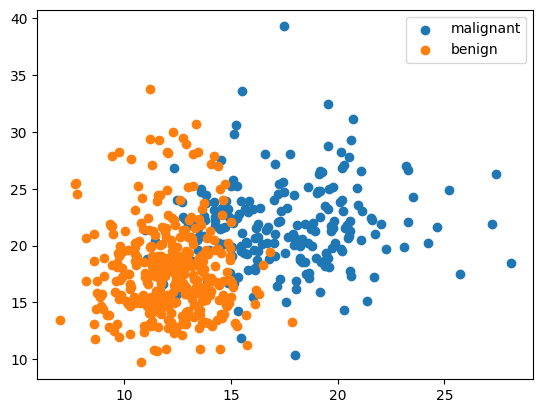

Name: Iris plants dataset


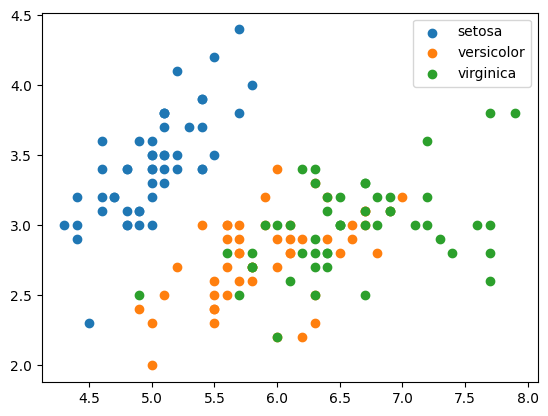

Name: Wine recognition dataset


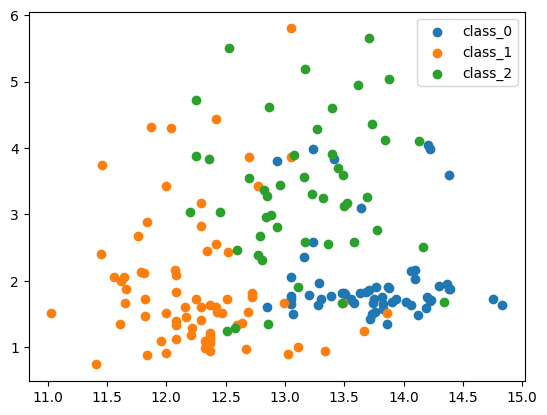

Name: Optical recognition of handwritten digits dataset


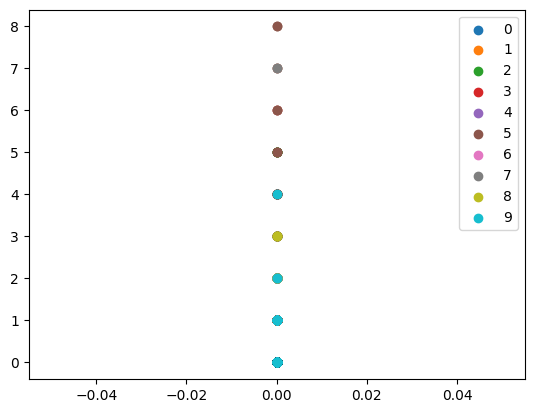

In [ ]:
for d in datasets:
  plot_dataset(d)

Проанализировав полученные графики мы можем прийти к следующим выводам : GaussianNB (гауссовский наивный Байес) - подойдет для первых трех графиков, так как данных много и они не распределены никакой определенной частотой

Optical recognition или же 4 датасет наиболее подходит для того чтобы с ним работали с помощью MultinomialNB (мультиномиальный наивный Байес): Этот метод подходит для дискретных признако (т.е наблюдающихся с опр. частотой, как на нашем графике )

Опираясь на эту информацию. Воспользуемся нашими выводами, чтобы применить правильные распределения к графикам.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

def G(dataset):
    data = dataset()
    print("Name:", data.DESCR.splitlines()[2])
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7)
    metod = GaussianNB()
    metod.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, metod.predict(X_test)) * 100
    print("Accuracy:", round(accuracy, 5), "%\n")


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

def G(dataset):
    data = dataset
    print("Name:", data.DESCR.splitlines()[2])
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7)
    method = GaussianNB()
    method.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, method.predict(X_test)) * 100
    print("Accuracy:", round(accuracy, 5), "%\n")



In [ ]:
# Метод Гаусса для первых трех датасетов
Gauss = [datasets.load_breast_cancer(), datasets.load_iris(), datasets.load_wine()]

for i in Gauss:
    G(i)

Name: Breast cancer wisconsin (diagnostic) dataset
Accuracy: 94.15205 %

Name: Iris plants dataset
Accuracy: 93.33333 %

Name: Wine recognition dataset
Accuracy: 96.2963 %



In [ ]:
#Метод Мультинамиала
data = datasets.load_digits()
print("Name:", data.DESCR.splitlines()[2])
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7)
metod = MultinomialNB()
metod.fit(X_train, y_train)
accuracy = accuracy_score(y_test, metod.predict(X_test)) * 100
print("Accuracy:", round(accuracy, 5), "%\n")

Name: Optical recognition of handwritten digits dataset
Accuracy: 89.62963 %



In [ ]:
#поиск лучшего метода для нашего датасета
print("Ur_dataset")
data = Uriupkina_dataset()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7)
best_acc = 0
best_metod = ""
arr_acc = []
k = 0
metods = [GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB]

for m in metods:
    model = m()
    name = model.__class__.__name__
    print("Metod:", name)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test)) * 100
    arr_acc.append(acc)
    k += 1
    print(f"  Точность предсказания вероятности составляет {round(acc, 5)}%")

    if acc > best_acc:
        best_acc = acc
        best_metod = name

print("The best metod:", best_metod)


Uriupkina_dataset
Metod: GaussianNB
  Точность предсказания вероятности составляет 63.66667%
Metod: MultinomialNB
  Точность предсказания вероятности составляет 56.0%
Metod: ComplementNB
  Точность предсказания вероятности составляет 44.0%
Metod: BernoulliNB
  Точность предсказания вероятности составляет 55.0%
Metod: CategoricalNB
  Точность предсказания вероятности составляет 82.33333%
The best metod: CategoricalNB


Несмотря на свою простоту, Наивный Байес является мощным инструментом в машинном обучении и часто используется в различных областях, включая биоинформатику, финансы, медицину и другие.